In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("stroke_risk_dataset_v2.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     35000 non-null  int64  
 1   gender                  35000 non-null  object 
 2   chest_pain              35000 non-null  int64  
 3   high_blood_pressure     35000 non-null  int64  
 4   irregular_heartbeat     35000 non-null  int64  
 5   shortness_of_breath     35000 non-null  int64  
 6   fatigue_weakness        35000 non-null  int64  
 7   dizziness               35000 non-null  int64  
 8   swelling_edema          35000 non-null  int64  
 9   neck_jaw_pain           35000 non-null  int64  
 10  excessive_sweating      35000 non-null  int64  
 11  persistent_cough        35000 non-null  int64  
 12  nausea_vomiting         35000 non-null  int64  
 13  chest_discomfort        35000 non-null  int64  
 14  cold_hands_feet         35000 non-null

In [5]:
df.isnull().sum()

,0
age,0
gender,0
chest_pain,0
high_blood_pressure,0
irregular_heartbeat,0
shortness_of_breath,0
fatigue_weakness,0
dizziness,0
swelling_edema,0
neck_jaw_pain,0


In [8]:
df.duplicated().sum()

np.int64(16279)

In [10]:
df=df.drop_duplicates()

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18721 entries, 0 to 34997
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     18721 non-null  int64  
 1   gender                  18721 non-null  object 
 2   chest_pain              18721 non-null  int64  
 3   high_blood_pressure     18721 non-null  int64  
 4   irregular_heartbeat     18721 non-null  int64  
 5   shortness_of_breath     18721 non-null  int64  
 6   fatigue_weakness        18721 non-null  int64  
 7   dizziness               18721 non-null  int64  
 8   swelling_edema          18721 non-null  int64  
 9   neck_jaw_pain           18721 non-null  int64  
 10  excessive_sweating      18721 non-null  int64  
 11  persistent_cough        18721 non-null  int64  
 12  nausea_vomiting         18721 non-null  int64  
 13  chest_discomfort        18721 non-null  int64  
 14  cold_hands_feet         18721 non-null  int

In [38]:
df=df.drop(columns='stroke_risk_percentage')

<Axes: xlabel='at_risk', ylabel='count'>

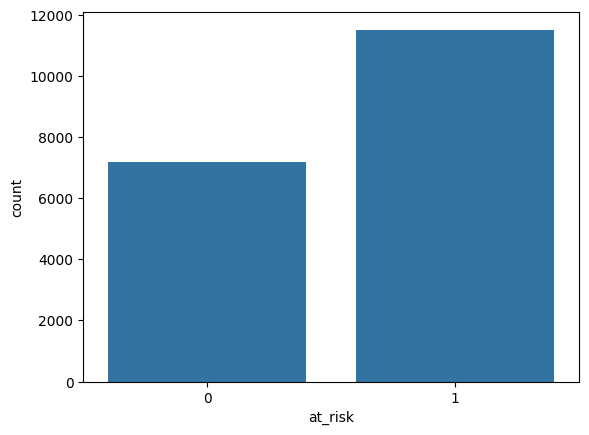

In [62]:
sns.countplot(df,x='at_risk')

<Axes: xlabel='at_risk', ylabel='count'>

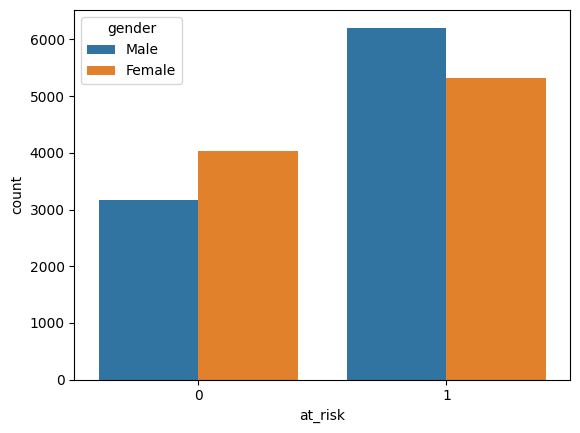

In [41]:
sns.countplot(df,x='at_risk',hue='gender')

In [68]:
# Males have more risk of stroke by 16.46 percent

risk_percentages = df.groupby('gender')['at_risk'].mean() * 100
female_risk = risk_percentages['Female']
male_risk = risk_percentages['Male']

percentage_increase = ((male_risk - female_risk) / female_risk) * 100
percentage_increase

np.float64(16.458955660081525)

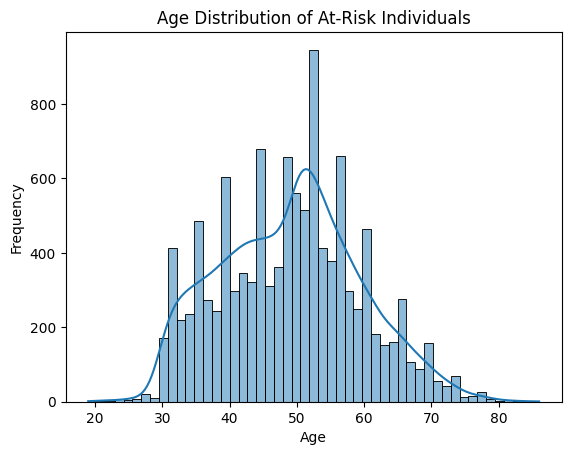

In [69]:
sns.histplot((df[df['at_risk'] == 1]['age']),kde=True)
plt.title('Age Distribution of At-Risk Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

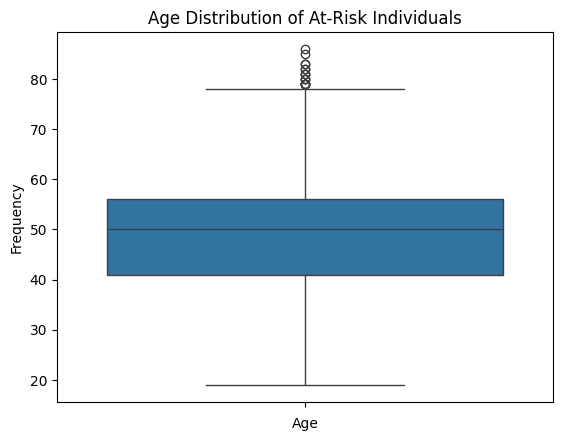

In [72]:
sns.boxplot(df[df['at_risk'] == 1]['age'])
plt.title('Age Distribution of At-Risk Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [74]:
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return len(outliers)

outlier_count = count_outliers_iqr(df, 'age')
print(f"Number of outliers in 'age': {outlier_count}")

Number of outliers in 'age': 12


In [75]:
# Since the number of outliers ver less we can remove them safely

In [76]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned

df_cleaned = remove_outliers_iqr(df, 'age')

In [94]:
df=df_cleaned

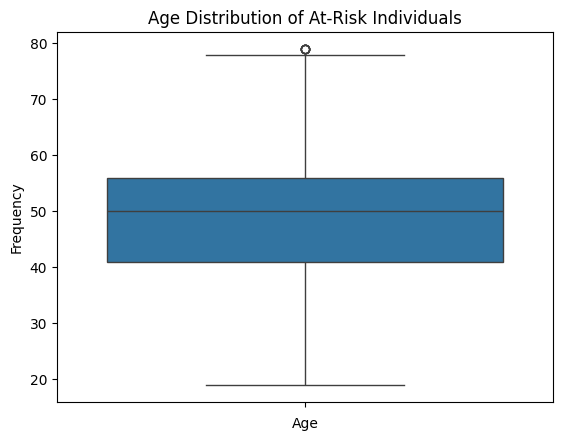

In [95]:
sns.boxplot(df[df['at_risk'] == 1]['age'])
plt.title('Age Distribution of At-Risk Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

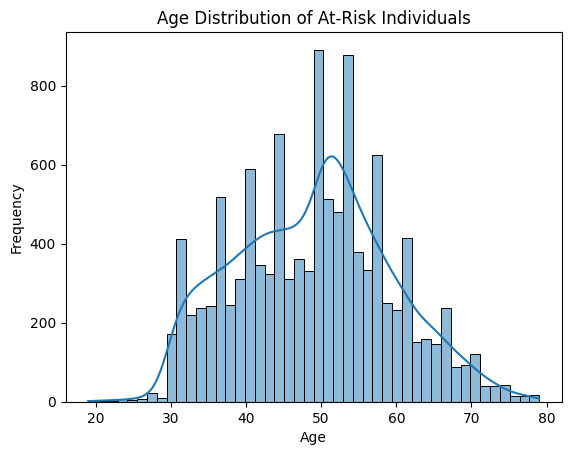

In [96]:
sns.histplot((df[df['at_risk'] == 1]['age']),kde=True)
plt.title('Age Distribution of At-Risk Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

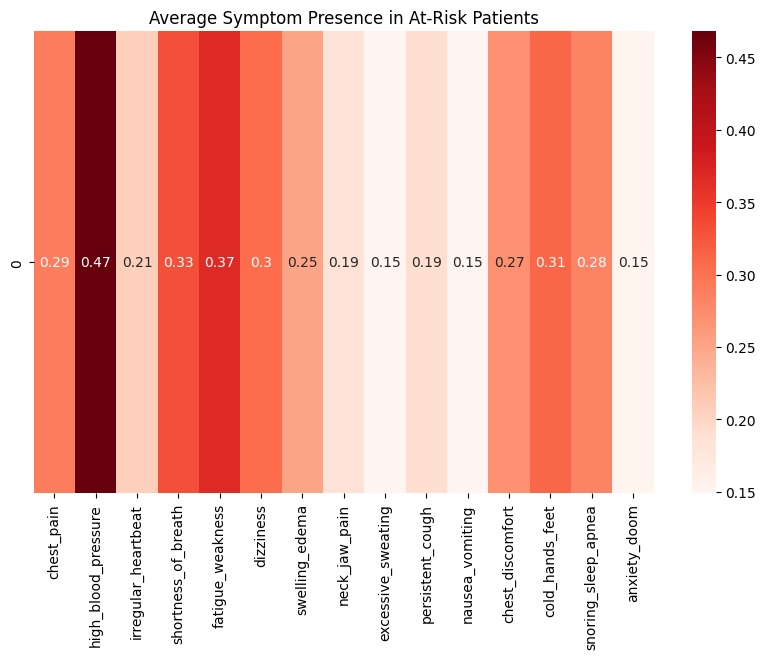

In [97]:
# Feature Presence in At-Risk Patients

symptoms = df.drop(columns=['age', 'gender', 'at_risk'])

# Compute mean presence of each symptom for at-risk patients
risk_symptom_means = df[df['at_risk'] == 1][symptoms.columns].mean()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(risk_symptom_means).T, annot=True, cmap='Reds')
plt.title('Average Symptom Presence in At-Risk Patients')
plt.show()

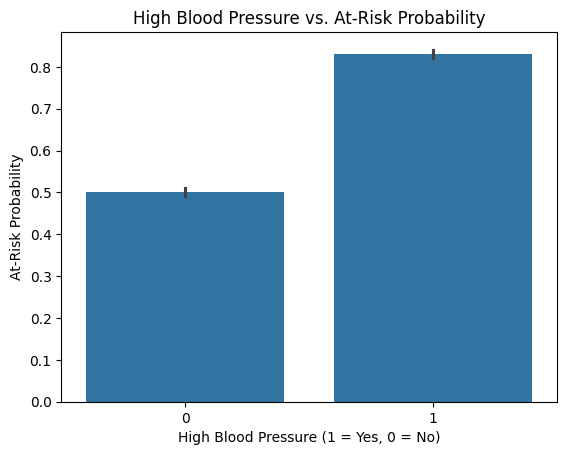

In [99]:
sns.barplot(x='high_blood_pressure', y='at_risk', data=df)
plt.title('High Blood Pressure vs. At-Risk Probability')
plt.xlabel('High Blood Pressure (1 = Yes, 0 = No)')
plt.ylabel('At-Risk Probability')
plt.show()

In [100]:
df.sample(5)

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,at_risk
28855,58,Male,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1
16639,33,Female,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1
30782,65,Male,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1
24291,45,Male,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
13809,34,Female,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [103]:
df['at_risk'].value_counts(normalize=True) * 100

,proportion
at_risk,
1,61.531883
0,38.468117


In [104]:
# Data is slighty imbalanced

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X=df.drop(columns='at_risk')
y=df['at_risk']

In [108]:
X_train,X_text,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [109]:
X_train

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom
21905,34,Male,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6439,34,Male,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
16066,40,Female,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0
11450,31,Female,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0
18551,43,Female,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18580,59,Female,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1
19933,57,Female,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7682,31,Female,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0
986,56,Male,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [112]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

In [117]:
transformer = ColumnTransformer(
    transformers=[
        ('gender', OneHotEncoder(sparse_output=False, drop='first'), ['gender']),
        ('age', MinMaxScaler(), ['age']),
    ],
    remainder='passthrough'
)

In [121]:
transformer.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('gender',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['gender']),
                                ('age', MinMaxScaler(), ['age'])])

In [124]:
X_train_transformed = pd.DataFrame(transformer.transform(X_train), columns=transformer.get_feature_names_out())

In [125]:
X_train_transformed

,gender__gender_Male,age__age,remainder__chest_pain,remainder__high_blood_pressure,remainder__irregular_heartbeat,remainder__shortness_of_breath,remainder__fatigue_weakness,remainder__dizziness,remainder__swelling_edema,remainder__neck_jaw_pain,remainder__excessive_sweating,remainder__persistent_cough,remainder__nausea_vomiting,remainder__chest_discomfort,remainder__cold_hands_feet,remainder__snoring_sleep_apnea,remainder__anxiety_doom
0,1.0,0.262295,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.262295,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.360656,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.213115,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.409836,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,0.0,0.672131,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14963,0.0,0.639344,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14964,0.0,0.213115,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
14965,1.0,0.622951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [126]:
X_test_transformed = pd.DataFrame(transformer.transform(X_text), columns=transformer.get_feature_names_out())

In [131]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


best_models = {}

def tune_and_evaluate(model, param_grid, model_name):
    grid_search = RandomizedSearchCV(model, param_grid, scoring='accuracy', cv=5, n_iter=10, n_jobs=-1, verbose=1, random_state=42)
    grid_search.fit(X_train_transformed, y_train)

    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    y_pred = best_model.predict(X_test_transformed)
    y_train_pred = best_model.predict(X_train_transformed)

    print(f"\nBest {model_name}: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Training accuracy: {accuracy_score(y_train, y_train_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

    return best_model


# Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
tune_and_evaluate(LogisticRegression(), param_grid_lr, "Logistic Regression")

# Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tune_and_evaluate(DecisionTreeClassifier(), param_grid_dt, "Decision Tree")

# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tune_and_evaluate(RandomForestClassifier(), param_grid_rf, "Random Forest")

# Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
tune_and_evaluate(GradientBoostingClassifier(), param_grid_gb, "Gradient Boosting")

# XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
tune_and_evaluate(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, "XGBoost")

# Support Vector Machine (SVM)
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
tune_and_evaluate(SVC(), param_grid_svm, "Support Vector Machine")

# K-Nearest Neighbors (KNN)
param_grid_knn = {
    'n_neighbors': [3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
tune_and_evaluate(KNeighborsClassifier(), param_grid_knn, "K-Nearest Neighbors")

# Multi-Layer Perceptron (Neural Network)
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}
tune_and_evaluate(MLPClassifier(max_iter=500), param_grid_mlp, "Neural Network (MLPClassifier)")

print("\nBest models from hyperparameter tuning:")
for model_name, model in best_models.items():
    print(f"{model_name}: {model}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
Accuracy: 0.9786
Training accuracy: 0.973074096345293
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1404
           1       0.98      0.98      0.98      2338

    accuracy                           0.98      3742
   macro avg       0.98      0.98      0.98      3742
weighted avg       0.98      0.98      0.98      3742


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}
Accuracy: 0.9110
Training accuracy: 0.9782855615687847
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1404
           1       0.95      0.91      0.93      2338

    accuracy                           0.91  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:54:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best XGBoost: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
Accuracy: 0.9658
Training accuracy: 0.9736754192556959
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1404
           1       0.97      0.97      0.97      2338

    accuracy                           0.97      3742
   macro avg       0.96      0.96      0.96      3742
weighted avg       0.97      0.97      0.97      3742


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Support Vector Machine: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
Accuracy: 0.9872
Training accuracy: 0.9843656043295249
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1404
           1       0.99      0.99      0.99      2338

    accuracy                           0.99      3742
   macro avg       0.99      0.99      0.99      3742
weighted avg       0.99      0.99 

In [148]:
model = best_models['Logistic Regression']

importance = np.abs(model.coef_[0])

importance_df = pd.DataFrame({"Feature": transformer.get_feature_names_out(), "Importance": importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print(importance_df)

                           Feature  Importance
1                         age__age   44.220764
2            remainder__chest_pain    9.949125
3   remainder__high_blood_pressure    9.455064
5   remainder__shortness_of_breath    7.384812
13     remainder__chest_discomfort    7.367479
15  remainder__snoring_sleep_apnea    7.355858
4   remainder__irregular_heartbeat    7.278507
6      remainder__fatigue_weakness    5.000382
11     remainder__persistent_cough    4.992109
14      remainder__cold_hands_feet    4.896171
7             remainder__dizziness    4.848744
9         remainder__neck_jaw_pain    4.697550
8        remainder__swelling_edema    4.643340
0              gender__gender_Male    2.985321
16         remainder__anxiety_doom    2.457233
10   remainder__excessive_sweating    2.261649
12      remainder__nausea_vomiting    2.232482


In [149]:
mlp_model = best_models['Neural Network (MLPClassifier)']

importance = np.sum(np.abs(mlp_model.coefs_[0]), axis=1)

importance_df = pd.DataFrame({"Feature": transformer.get_feature_names_out(), "Importance": importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print(importance_df)

                           Feature  Importance
1                         age__age   77.124037
2            remainder__chest_pain   25.846034
15  remainder__snoring_sleep_apnea   23.872395
5   remainder__shortness_of_breath   21.418370
3   remainder__high_blood_pressure   20.218676
13     remainder__chest_discomfort   19.773356
4   remainder__irregular_heartbeat   19.573728
11     remainder__persistent_cough   17.250224
7             remainder__dizziness   17.109398
6      remainder__fatigue_weakness   15.449088
9         remainder__neck_jaw_pain   15.265092
14      remainder__cold_hands_feet   15.224025
8        remainder__swelling_edema   14.865165
16         remainder__anxiety_doom   14.680741
0              gender__gender_Male   14.107826
12      remainder__nausea_vomiting   12.747857
10   remainder__excessive_sweating   12.241496


AUC-ROC Score: 0.9998428052320268


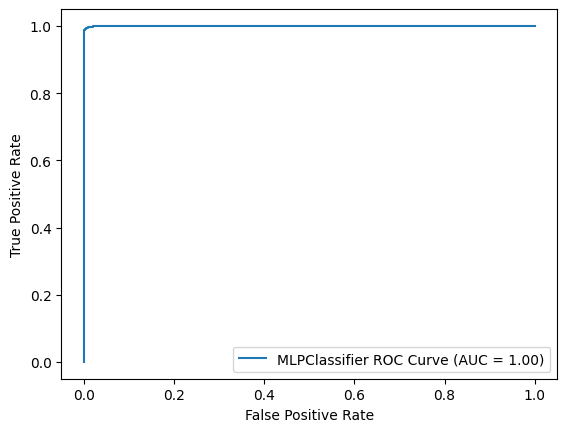

In [157]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_scores = mlp_model.predict_proba(X_test_transformed)[:, 1]

roc_auc = roc_auc_score(y_test, y_scores)
print("AUC-ROC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.plot(fpr, tpr, label="MLPClassifier ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [137]:
import pickle

for model_name, model in best_models.items():
    filename = model_name.replace(" ", "_").replace("(", "").replace(")", "") + ".pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

print("Models exported successfully.")

Models exported successfully.


In [155]:
with open('column_transformer.pkl', 'wb') as file:
        pickle.dump(transformer, file)

In [143]:
def predict(model, age, gender, chest_pain, high_blood_pressure, irregular_heartbeat,
            shortness_of_breath, fatigue_weakness, dizziness, swelling_edema, neck_jaw_pain,
            excessive_sweating, persistent_cough, nausea_vomiting, chest_discomfort, cold_hands_feet,
            snoring_sleep_apnea, anxiety_doom):

    test_df = pd.DataFrame({
        'age': [age],
        'gender': [gender],
        'chest_pain': [chest_pain],
        'high_blood_pressure': [high_blood_pressure],
        'irregular_heartbeat': [irregular_heartbeat],
        'shortness_of_breath': [shortness_of_breath],
        'fatigue_weakness': [fatigue_weakness],
        'dizziness': [dizziness],
        'swelling_edema': [swelling_edema],
        'neck_jaw_pain': [neck_jaw_pain],
        'excessive_sweating': [excessive_sweating],
        'persistent_cough': [persistent_cough],
        'nausea_vomiting': [nausea_vomiting],
        'chest_discomfort': [chest_discomfort],
        'cold_hands_feet': [cold_hands_feet],
        'snoring_sleep_apnea': [snoring_sleep_apnea],
        'anxiety_doom': [anxiety_doom]
    })

    test_df = pd.DataFrame(transformer.transform(test_df), columns=transformer.get_feature_names_out())

    prediction = model.predict(test_df)[0]

    return prediction


In [153]:
prediction_result = predict(
    best_models['Support Vector Machine'],
    age=33,
    gender="Female",
    chest_pain=0,
    high_blood_pressure=0,
    irregular_heartbeat=1,
    shortness_of_breath=1,
    fatigue_weakness=1,
    dizziness=0,
    swelling_edema=0,
    neck_jaw_pain=0,
    excessive_sweating=0,
    persistent_cough=0,
    nausea_vomiting=0,
    chest_discomfort=0,
    cold_hands_feet=1,
    snoring_sleep_apnea=1,
    anxiety_doom=0
)

In [154]:
prediction_result

np.int64(1)